In [1]:
# importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Loan_Approval_Prediction/Loan_dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

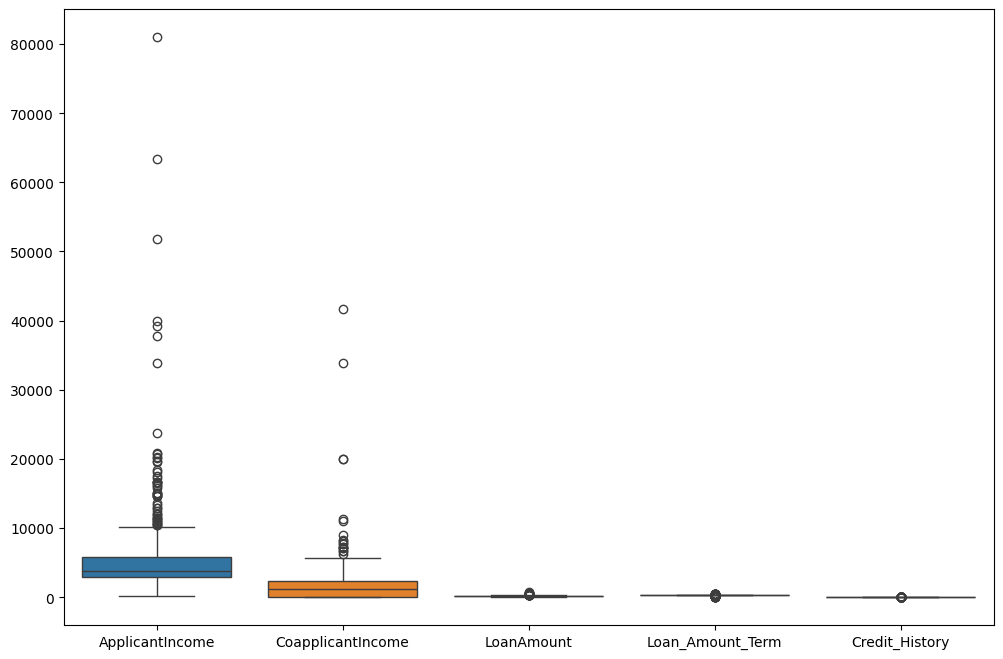

In [9]:
#Checking for Outliers:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)


In [10]:
# Filling null values for numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<Axes: >

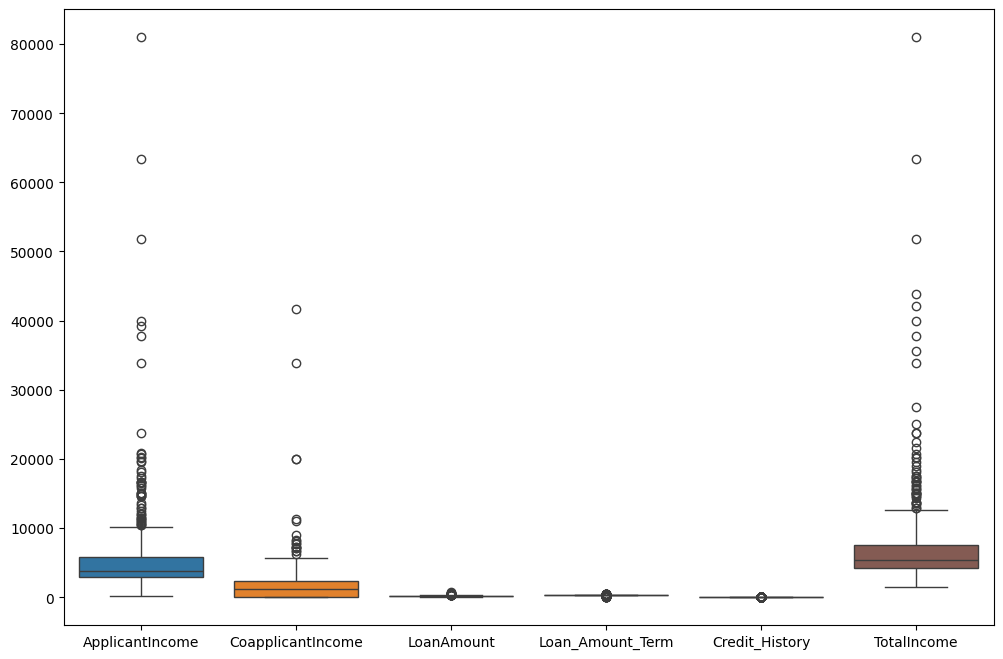

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [13]:
df['TotalIncome'] = df['TotalIncome'].fillna(df['TotalIncome'].median())

In [14]:
df['Gender'].mode()[0]

'Male'

In [15]:
# Filling null values for categorical datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [17]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

No. of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

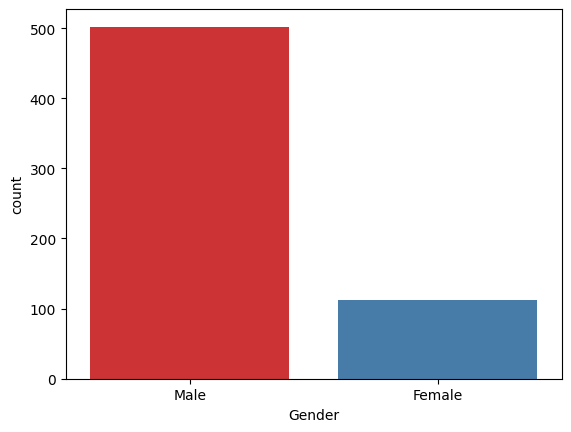

In [18]:
# Visualizing data
print('No. of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', hue = 'Gender', data = df, palette = 'Set1')

No. of people who took loan by Marital status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

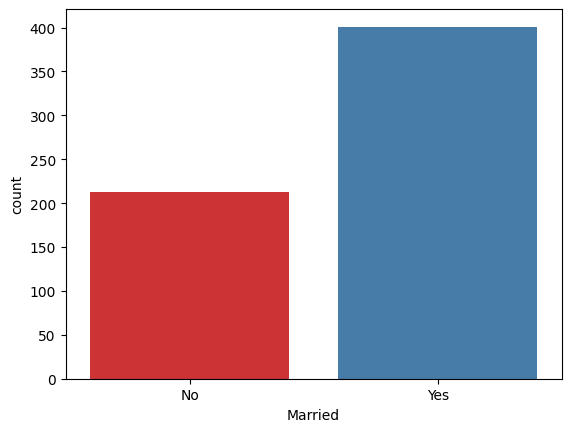

In [19]:
print('No. of people who took loan by Marital status')
print(df['Married'].value_counts())
sns.countplot(x = 'Married', hue = 'Married', legend = False, data = df, palette = 'Set1')

No. of people who took loan by Education status
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

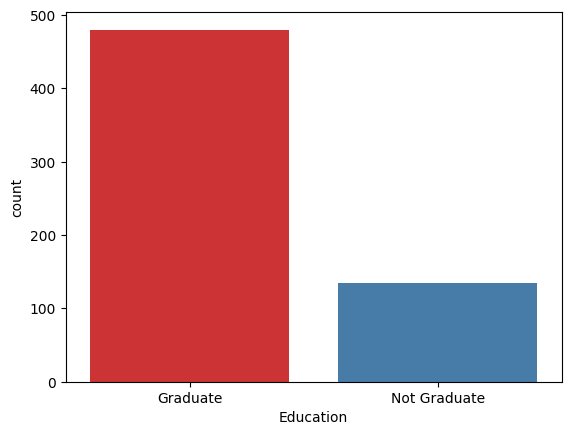

In [20]:
print('No. of people who took loan by Education status')
print(df['Education'].value_counts())
sns.countplot(x = 'Education', hue = 'Education', legend = False, data = df, palette = 'Set1')

In [21]:
#checking correlation among various factors
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
0,5849,0.0,146.412162,360.0,1.0,5849.0
1,4583,1508.0,128.000000,360.0,1.0,6091.0
2,3000,0.0,66.000000,360.0,1.0,3000.0
3,2583,2358.0,120.000000,360.0,1.0,4941.0
4,6000,0.0,141.000000,360.0,1.0,6000.0
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0
610,4106,0.0,40.000000,180.0,1.0,4106.0
611,8072,240.0,253.000000,360.0,1.0,8312.0
612,7583,0.0,187.000000,360.0,1.0,7583.0


In [22]:
corr = df_numeric.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447
TotalIncome,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000


<Axes: >

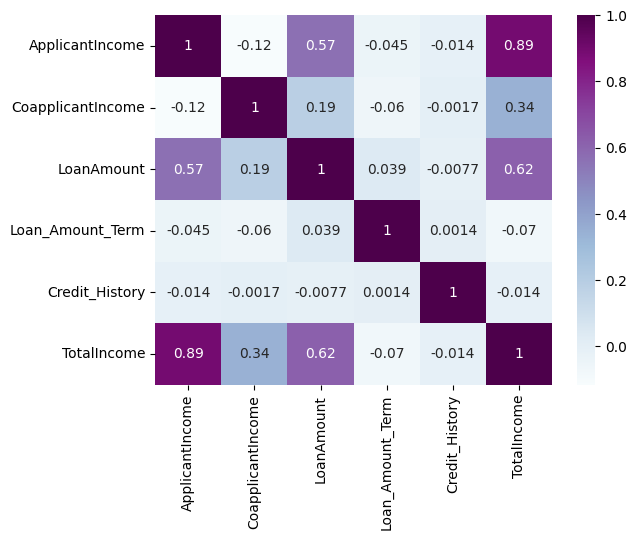

In [23]:
# Visualizing correlation using heatmap
sns.heatmap(corr, annot = True, cmap = 'BuPu')

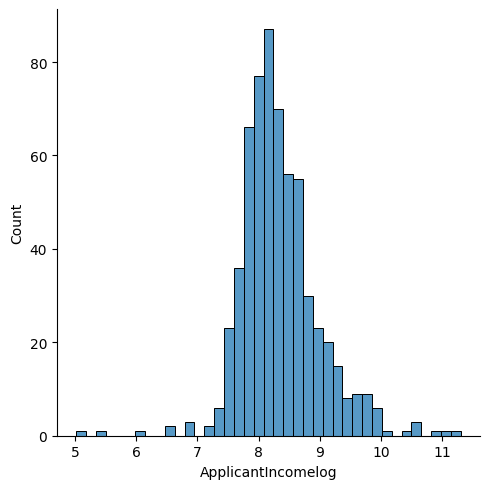

In [24]:
# Feature engineering: Normalizing of numerical datatype: log transformation
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.displot(df['ApplicantIncomelog'])

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681


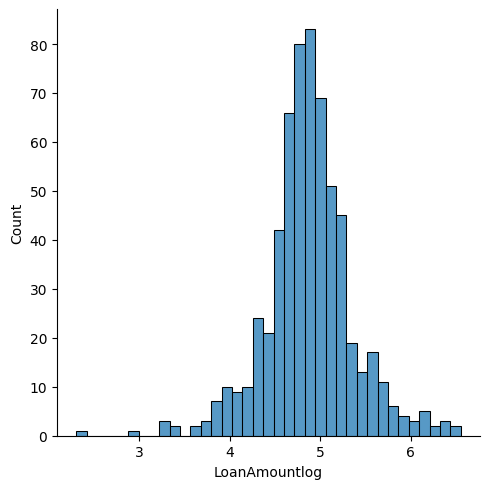

In [26]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.displot(df['LoanAmountlog'])

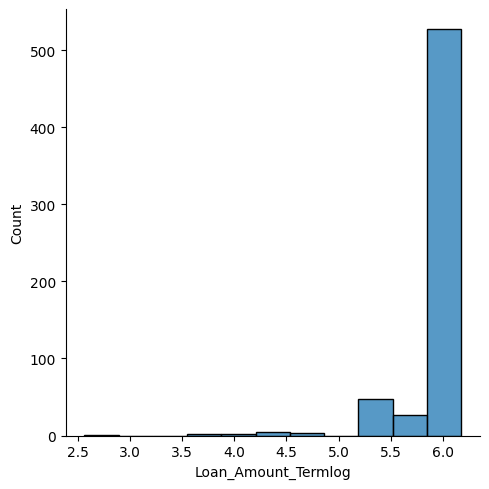

In [27]:
df['Loan_Amount_Termlog'] = np.log(df['Loan_Amount_Term'] + 1)
sns.displot(df['Loan_Amount_Termlog'])

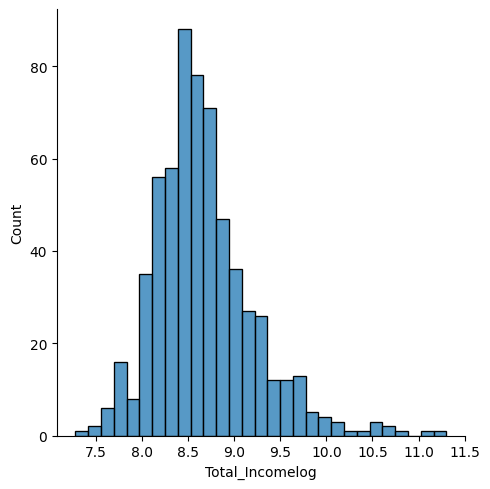

In [28]:
df['Total_Incomelog'] = np.log(df['TotalIncome'] + 1)
sns.displot(df['Total_Incomelog'])

In [29]:
# Dropping unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']
df = df.drop(columns = cols, axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [30]:
# Converting categorical data into numerical data: LAbel Encoding and One Hot Encoding...two ways to do it
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Dependents' , 'Self_Employed', 'Property_Area', 'Loan_Status' , 'Education']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,LP001002,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,LP001003,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,LP001005,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,LP001006,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,LP001008,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [32]:
df.dtypes

Loan_ID                 object
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
ApplicantIncomelog     float64
LoanAmountlog          float64
Loan_Amount_Termlog    float64
Total_Incomelog        float64
dtype: object

In [40]:
# Creating independent features and dependent feature that is loan status whether loan is approved or not
X = df.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
y = df['Loan_Status']

In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,1,0,0,0,0,1.0,2,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [43]:
# importing further necessary libraries for training testing 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# cross_val_score to check score of our model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 39)

In [45]:
# logistic REgression model
model = LogisticRegression()

In [46]:
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(x_test)

In [48]:
# Accuracy: ratio of the correctly predicted values to the actual values
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

82.46753246753246

In [49]:
precision = precision_score(y_test, y_pred)
precision*100

np.float64(79.54545454545455)